In [21]:
import pandas as pd
df=pd.read_csv('./grouped_data5.csv')
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,2853.325952,0.000000,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,2044.094146,83807.860000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,3801.447619,19957.600000,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,3072.812564,0.000000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,2918.856279,62755.410000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,3072.812564,0.000000,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,1639.131714,5736.961000,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,3328.880278,0.000000,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,1787.507381,25025.103333,2,1,46444.260,0,92888.52,high,1


# drop columns

In [22]:
df=df.drop(['credit_score','age','age_group','gender',
        'balance','balance_group','products_number',
        'credit_card','estimated_salary'],axis=1)
df

,credit__section,country,age_group_gender,tenure,balance_per_age,balance_per_tenure,salary_per_products,active_member,salary_range,churn
0,Poor,France,forties_Female,2,2853.325952,0.000000,101348.880,1,very high,1
1,Poor,Spain,forties_Female,1,2044.094146,83807.860000,112542.580,1,very high,0
2,Very poor,France,forties_Female,8,3801.447619,19957.600000,37977.190,0,very high,1
3,Fair,France,thirties_Female,1,3072.812564,0.000000,46913.315,0,high,0
4,Excellent,Spain,forties_Female,2,2918.856279,62755.410000,79084.100,1,high,0
...,...,...,...,...,...,...,...,...,...,...
9995,Good,France,thirties_Male,5,3072.812564,0.000000,48135.320,0,high,0
9996,Very poor,France,thirties_Male,10,1639.131714,5736.961000,101699.770,1,very high,0
9997,Fair,France,thirties_Female,7,3328.880278,0.000000,42085.580,1,medium,1
9998,Good,Germany,forties_Male,3,1787.507381,25025.103333,46444.260,0,high,1


In [23]:
df.shape

(10000, 10)

# 각 독립 변수의 분포를 종속 변수 값에 따라 확인하기

In [24]:
df.columns

Index(['credit__section', 'country', 'age_group_gender', 'tenure',
       'balance_per_age', 'balance_per_tenure', 'salary_per_products',
       'active_member', 'salary_range', 'churn'],
      dtype='object')

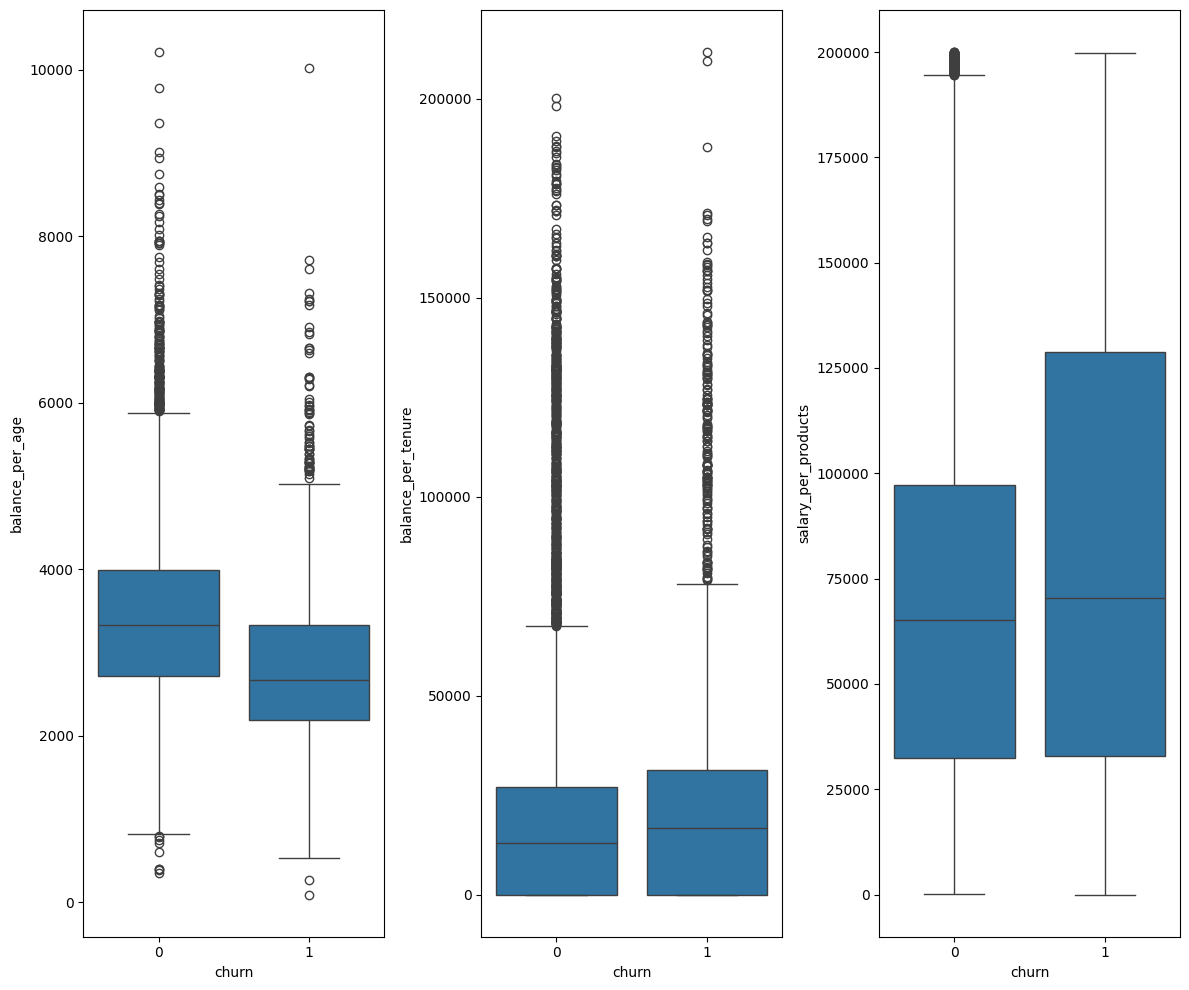

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# y값 리스트
y_vars = ['balance_per_age', 'balance_per_tenure', 'salary_per_products']

# subplot 설정
plt.figure(figsize=(12, 10))

for i, y_var in enumerate(y_vars):
    plt.subplot(1,3, i + 1)
    sns.boxplot(x='churn', y=y_var, data=df)
    plt.xlabel('churn')
    plt.ylabel(y_var)
    # plt.title(f'Distribution of {y_var} by churn')

plt.tight_layout()
plt.show()


In [26]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str or `.Figure` or `.SubFigure`, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``

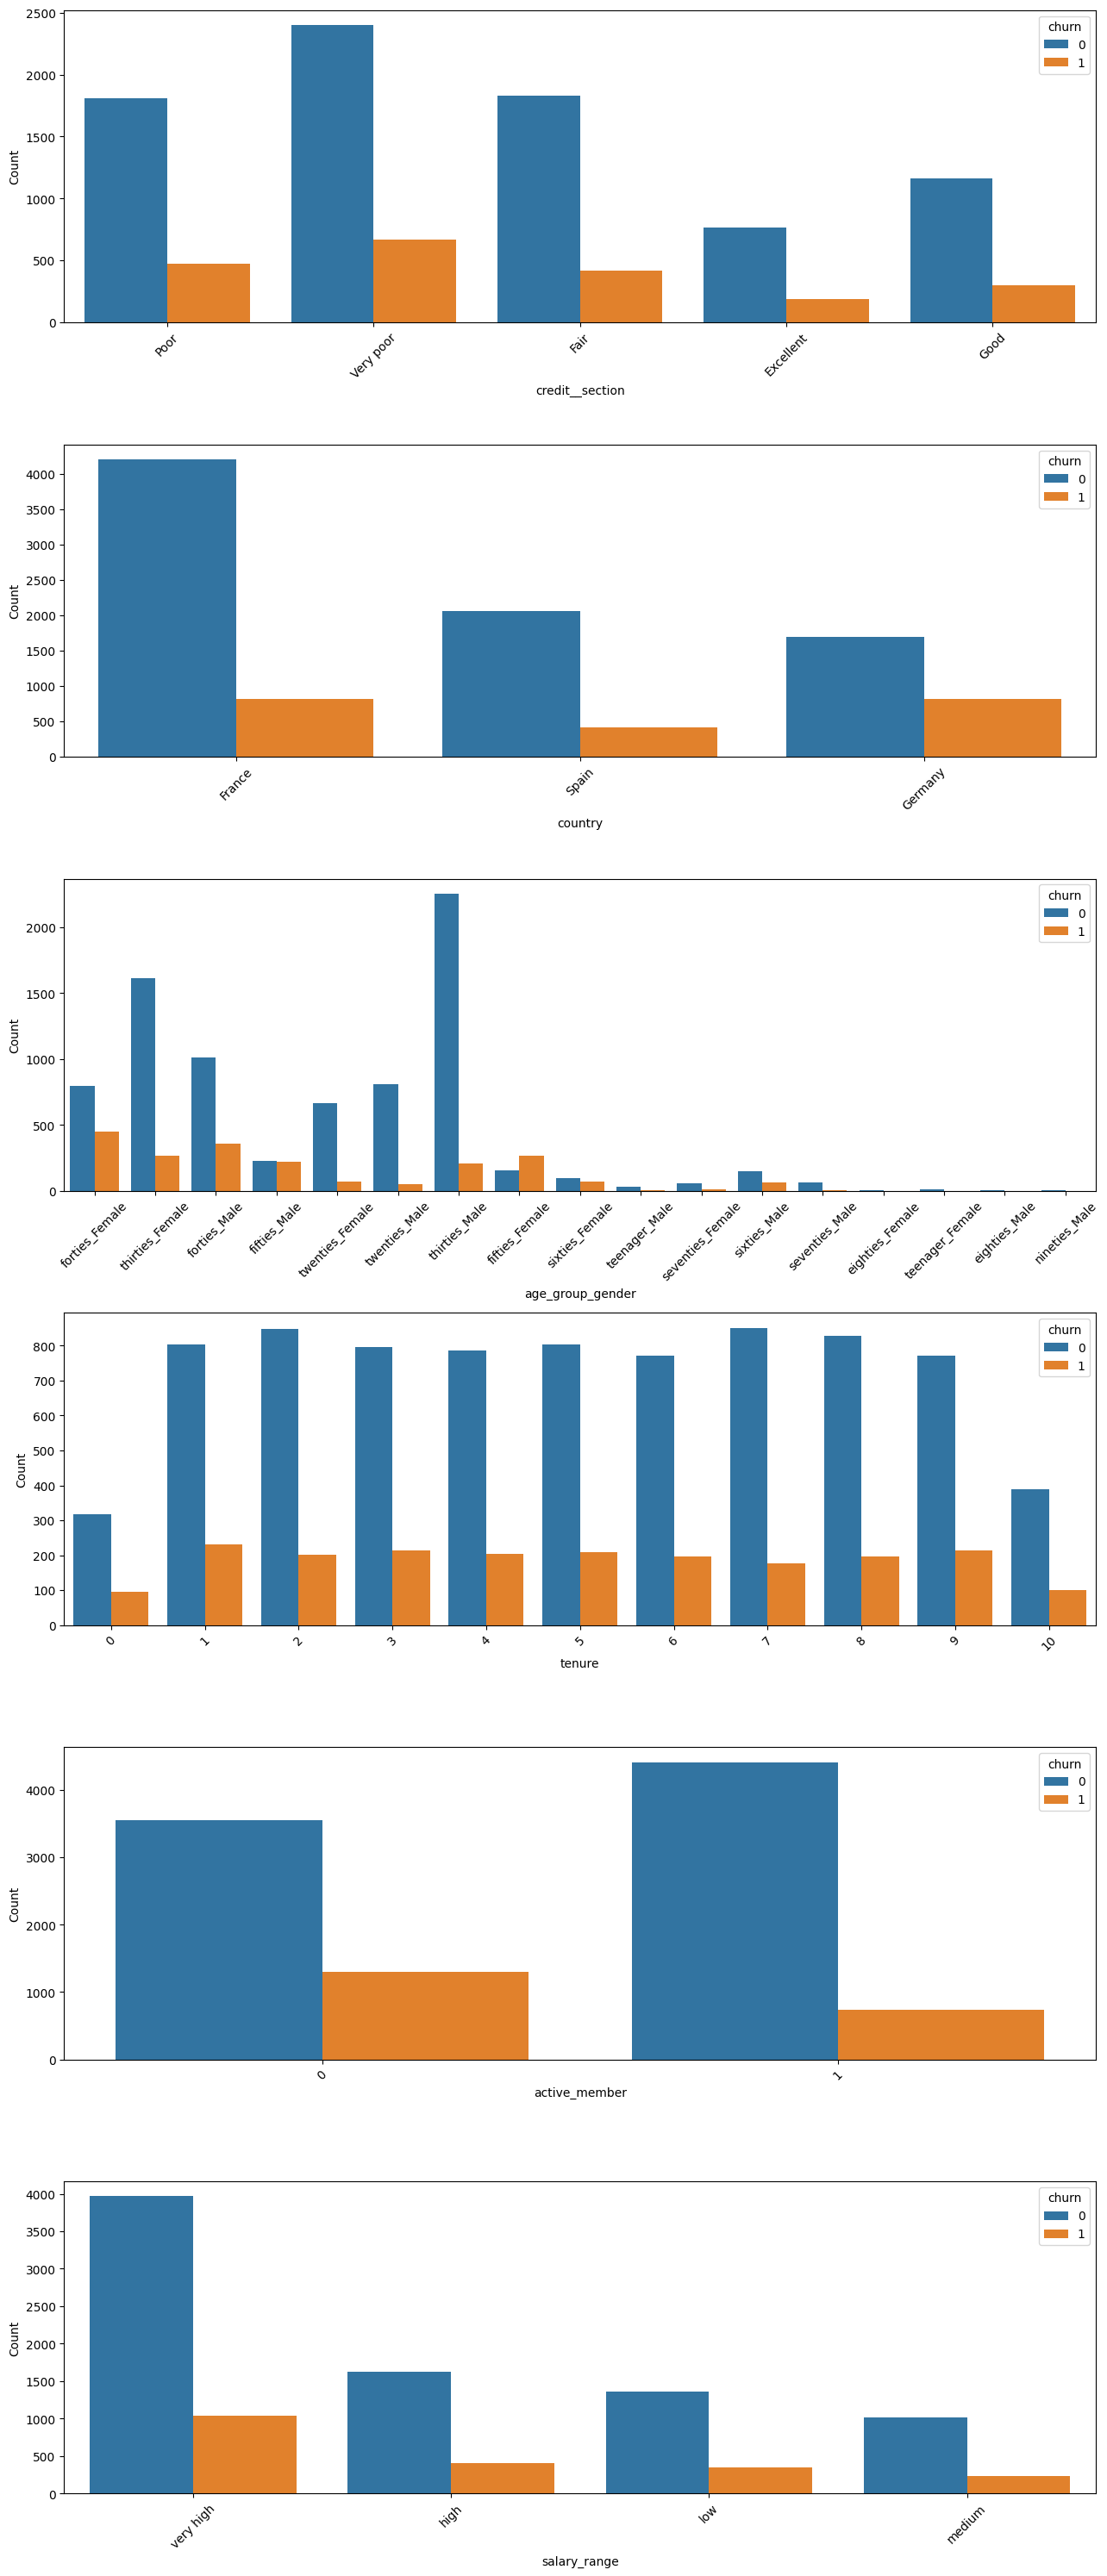

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 변수형 독립 변수 리스트
independent_vars = ['credit__section', 'country', 'age_group_gender', 'tenure',
                    'active_member', 'salary_range']

# subplot 설정
plt.figure(figsize=(13,30))

for i, var in enumerate(independent_vars):
    plt.subplot(6, 1, i + 1)
    # subplot(nrows, ncols, index, **kwargs)
    sns.countplot(x=var, hue='churn', data=df)
    # plt.title(f'Count of {var} by Dependent Variable')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


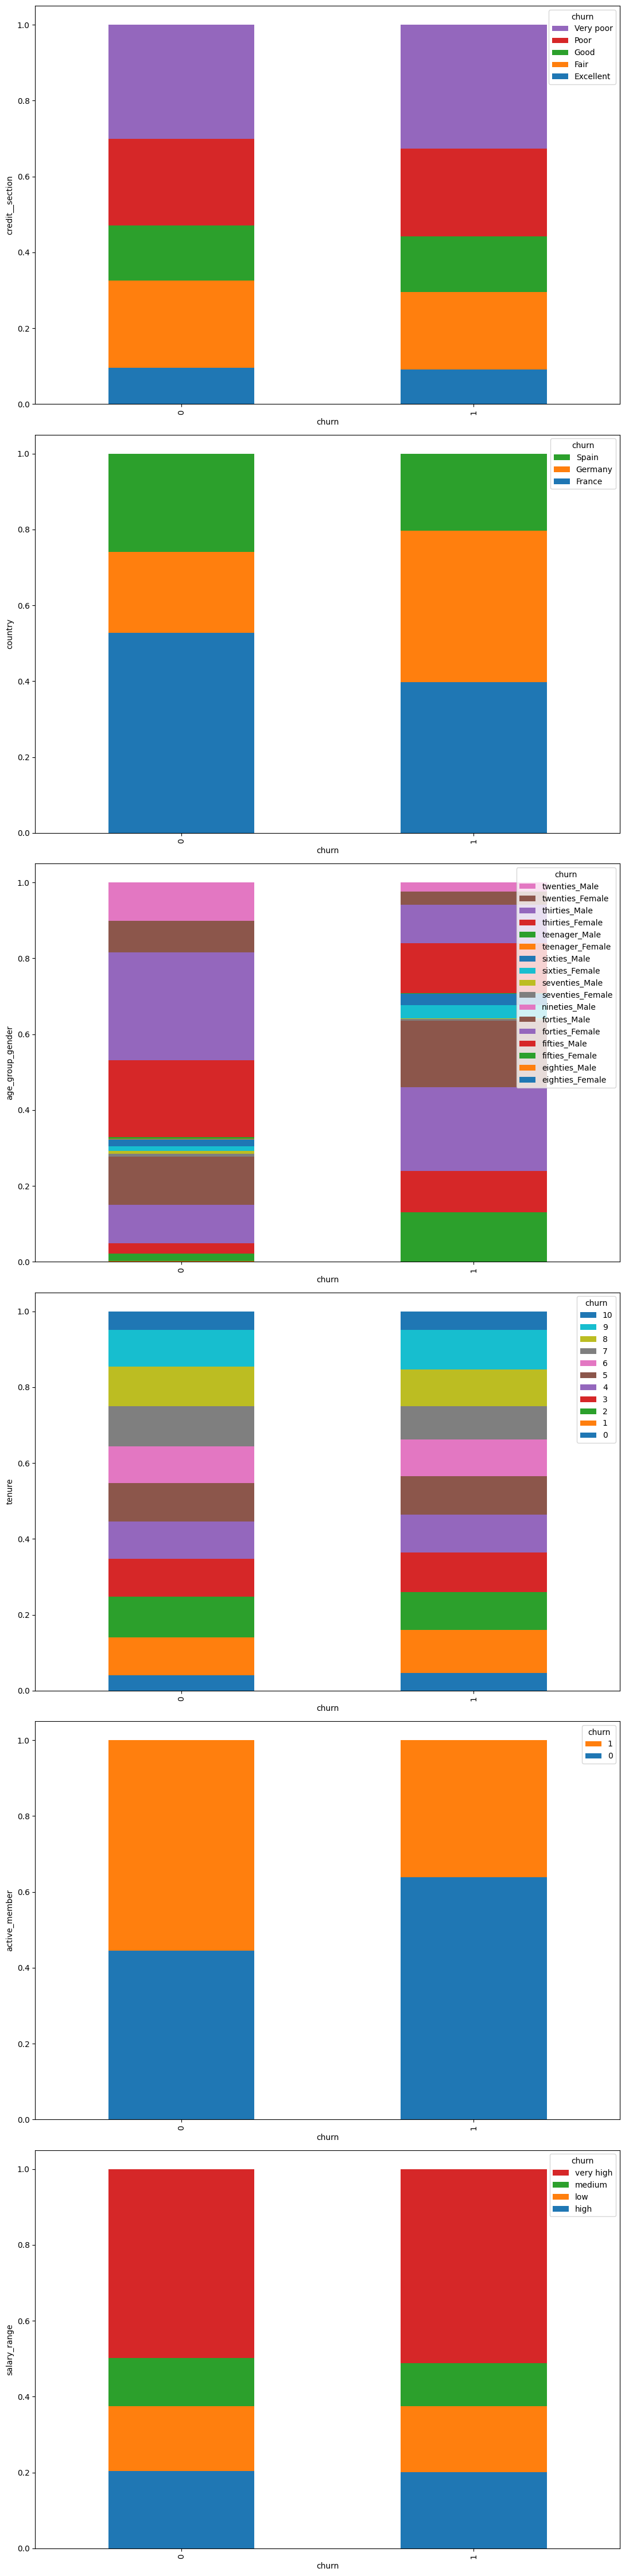

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 변수형 독립 변수 리스트
independent_vars = ['credit__section', 'country', 'age_group_gender', 'tenure',
                    'active_member', 'salary_range']

# subplot 설정
plt.figure(figsize=(11, 45))

for i, var in enumerate(independent_vars):
    plt.subplot(6, 1, i + 1)
    
    # 크로스탭을 사용하여 스택형 비율 계산
    crosstab = pd.crosstab(df['churn'], df[var], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca()
                #   color=['skyblue', 'orange']
                  )
    
    # plt.title(f'Stacked Bar Plot of {var} by Dependent Variable')
    plt.ylabel(var)
    plt.xlabel('churn')
    # plt.legend(title='churn', loc='upper right')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels), title='churn', loc='upper right')

plt.tight_layout()
plt.show()


In [29]:
df.rename(columns={'credit__section':'credit_section'},inplace=True)

In [30]:
df.columns

Index(['credit_section', 'country', 'age_group_gender', 'tenure',
       'balance_per_age', 'balance_per_tenure', 'salary_per_products',
       'active_member', 'salary_range', 'churn'],
      dtype='object')

# one hot encoding

In [31]:
df_encoded=pd.get_dummies(df,columns=['credit_section','country',
                                      'age_group_gender','salary_range'])
df_encoded=df_encoded.astype(int)
df_encoded

,tenure,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,credit_section_Excellent,credit_section_Fair,credit_section_Good,credit_section_Poor,...,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male,salary_range_high,salary_range_low,salary_range_medium,salary_range_very high
0,2,2853,0,101348,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2044,83807,112542,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,8,3801,19957,37977,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,3072,0,46913,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2,2918,62755,79084,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,3072,0,48135,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
9996,10,1639,5736,101699,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9997,7,3328,0,42085,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9998,3,1787,25025,46444,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df_encoded.columns

Index(['tenure', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products', 'active_member', 'churn',
       'credit_section_Excellent', 'credit_section_Fair',
       'credit_section_Good', 'credit_section_Poor',
       'credit_section_Very poor', 'country_France', 'country_Germany',
       'country_Spain', 'age_group_gender_eighties_Female',
       'age_group_gender_eighties_Male', 'age_group_gender_fifties_Female',
       'age_group_gender_fifties_Male', 'age_group_gender_forties_Female',
       'age_group_gender_forties_Male', 'age_group_gender_nineties_Male',
       'age_group_gender_seventies_Female', 'age_group_gender_seventies_Male',
       'age_group_gender_sixties_Female', 'age_group_gender_sixties_Male',
       'age_group_gender_teenager_Female', 'age_group_gender_teenager_Male',
       'age_group_gender_thirties_Female', 'age_group_gender_thirties_Male',
       'age_group_gender_twenties_Female', 'age_group_gender_twenties_Male',
       'salary_range_high', 'sala

In [33]:
df_encoded['age_group_gender_forties_Male'].value_counts()

age_group_gender_forties_Male
0    8629
1    1371
Name: count, dtype: int64

In [34]:
df.isin([0]).any()
# balance_per_tenure 에 0이 있다
# 계좌 잔액에서 0인 값들을 중앙값으로 대체한 적이 있다
# 혹시 결측치 처리 전에 파생변수를 만들어서 0이 많은건가

credit_section         False
country                False
age_group_gender       False
tenure                  True
balance_per_age        False
balance_per_tenure      True
salary_per_products    False
active_member           True
salary_range           False
churn                   True
dtype: bool

In [35]:
df['balance_per_tenure'].value_counts()
# 0이 전체의 약 40퍼센트


balance_per_tenure
0.000000         3893
19760.000000        2
11582.400000        2
47709.803333        1
132602.880000       1
                 ... 
22095.302500        1
22151.487143        1
5736.961000         1
25025.103333        1
67301.940000        1
Name: count, Length: 6106, dtype: int64

# balance_per_tenure 변수의 0의 값 의미 탐색

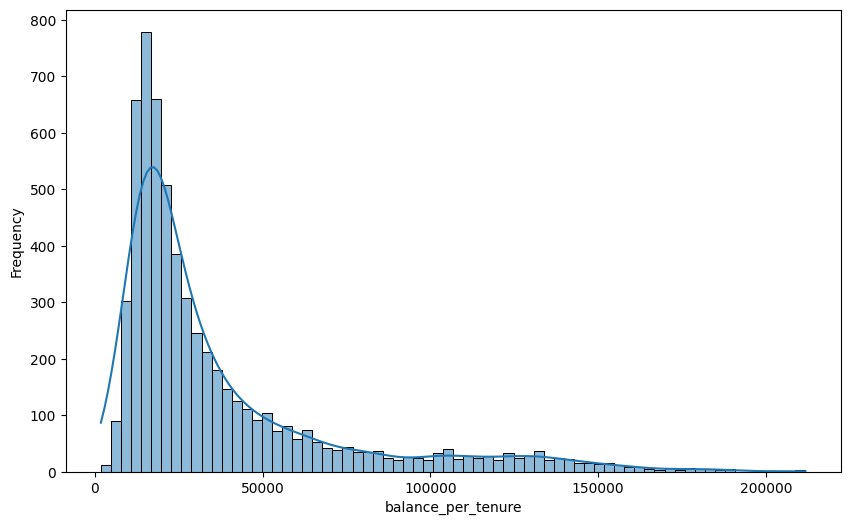

In [36]:
# 0인 값을 제외하고 나머지의 분포 확인

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0이 아닌 값만 선택
filtered_data = df['balance_per_tenure'][df['balance_per_tenure'] != 0]

# 히스토그램으로 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, kde=True)
# plt.title('Distribution of Data (excluding 0)')
plt.xlabel('balance_per_tenure')
plt.ylabel('Frequency')
plt.show()

# 안 그래도 데이터가 0인 것들이 많은데 특정 값에 나머지가 편중되어 있다
# 데이터를 변환할 필요가 있다

# 로그 변환을 시도

nan


c:\Users\chaey\anaconda3\envs\mldl\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\chaey\anaconda3\envs\mldl\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


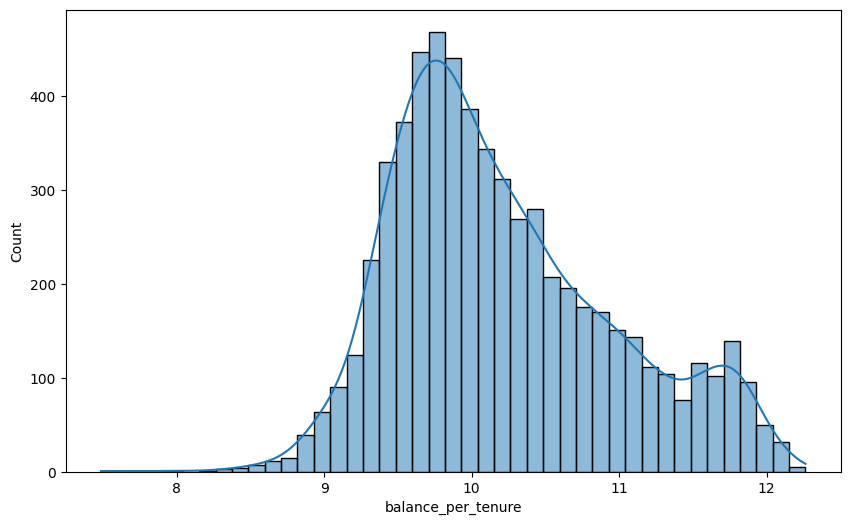

In [37]:
# 로그 변환

# 0과 0보다 작은 값을 작은 값으로 대체
data_with_small_value = np.where(df['balance_per_tenure'] <= 0, 1e-6, df['balance_per_tenure'])
# 로그 변환
df_log = np.log(df['balance_per_tenure'])
# skewness 확인
print(df_log.skew())
# KDE plot 출력
plt.figure(figsize=(10, 6))
sns.histplot(df_log, kde=True)
plt.show()

# skew가 nan이 나왔다
# 로그 변환을 하면서 데이터에 왜곡이 일어난 것
# 좀 더 조정을 해야 한다

# 표준화
### 평균 0, 표준편차 1
### 편차란 변량-평균 / 분산이란 편차의 제곱의 합을 갯수로 나누기 / 표준편차란 분산의 제곱근

In [38]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # 예시 데이터프레임
# df = pd.DataFrame({
#     '특성1': [1, 2, 3, 4, 5],
#     '특성2': [10, 20, 30, 40, 50],
#     '특성3': [100, 200, 300, 400, 500]
# })

# # 표준화 객체 생성
# scaler = StandardScaler()

# # 데이터프레임을 numpy 배열로 변환
# df_array = df.values

# # 표준화 적용
# df_scaled = scaler.fit_transform(df_array)

# # 표준화된 결과를 데이터프레임으로 변환
# df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

# print(df_scaled_df)
